Running RHC Algorithm with size 100 and seed 8...
Running RHC Algorithm with size 150 and seed 8...
Running RHC Algorithm with size 200 and seed 8...
Running RHC Algorithm with size 100 and seed 16...
Running RHC Algorithm with size 150 and seed 16...
Running RHC Algorithm with size 200 and seed 16...
Running RHC Algorithm with size 100 and seed 32...
Running RHC Algorithm with size 150 and seed 32...
Running RHC Algorithm with size 200 and seed 32...
Running RHC Algorithm with size 100 and seed 64...
Running RHC Algorithm with size 150 and seed 64...
Running RHC Algorithm with size 200 and seed 64...
Running RHC Algorithm with size 100 and seed 128...
Running RHC Algorithm with size 150 and seed 128...
Running RHC Algorithm with size 200 and seed 128...
Running SA Algorithm with size 100 and seed 8...
Running SA Algorithm with size 150 and seed 8...
Running SA Algorithm with size 200 and seed 8...
Running SA Algorithm with size 100 and seed 16...
Running SA Algorithm with size 150 and

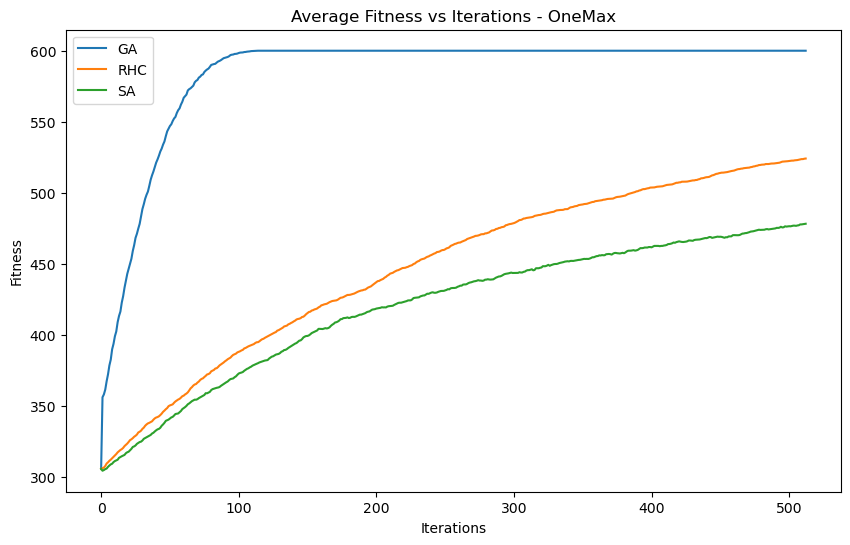

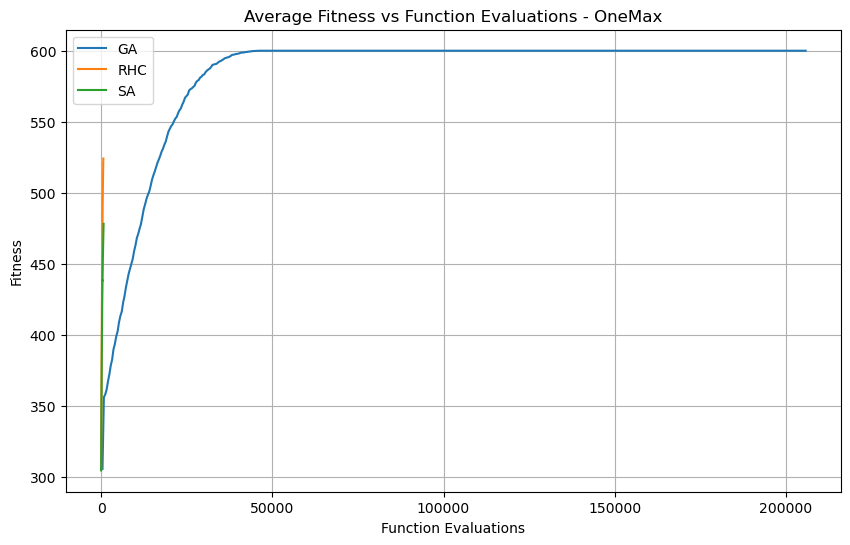

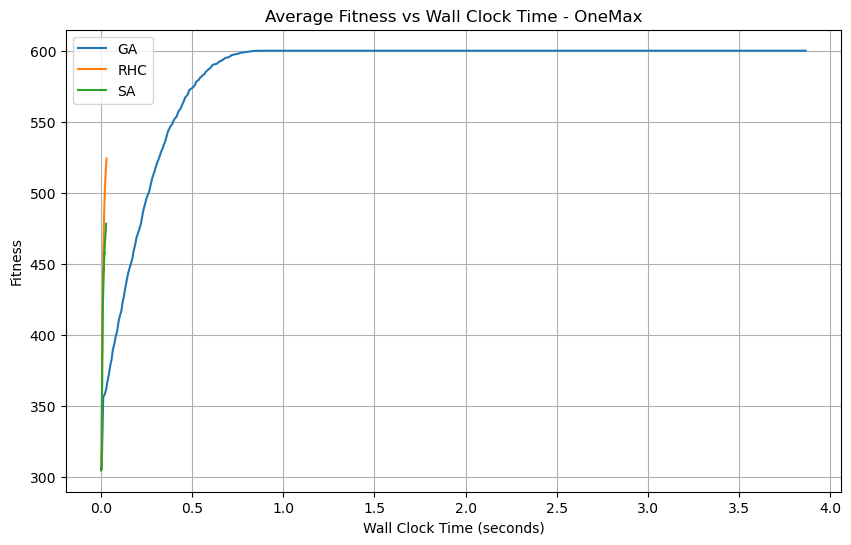

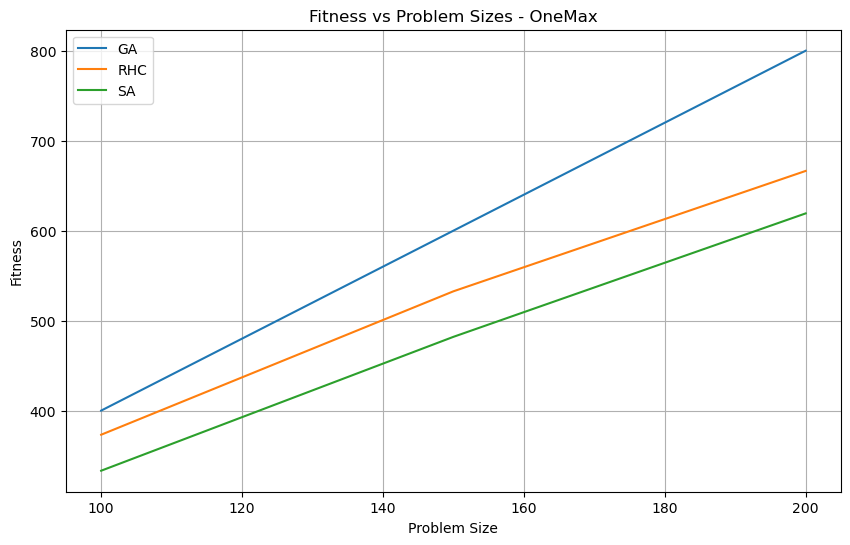

In [78]:
import numpy
import pandas
import matplotlib.pyplot as plt
import mlrose_hiive

def create_runner(algo_name, problem, prob_size, rand_seed):
    experiment_name = f'OneMax_{algo_name}_Size{prob_size}_Seed{rand_seed}'
    if algo_name == 'RHC':
        return mlrose_hiive.RHCRunner(problem=problem, experiment_name=experiment_name, seed=rand_seed, iteration_list=2**numpy.arange(10), restart_list=[0])
    elif algo_name == 'SA':
        return mlrose_hiive.SARunner(problem=problem, experiment_name=experiment_name, seed=rand_seed, iteration_list=2**numpy.arange(10), temperature_list=[mlrose_hiive.ExpDecay(init_temp=100, exp_const=1, min_temp=1.0)])
    elif algo_name == 'GA':
        return mlrose_hiive.GARunner(problem=problem, experiment_name=experiment_name, seed=rand_seed, iteration_list=2**numpy.arange(10), population_sizes=[400], mutation_rates=[0.5])

problem_sizes = [100, 150, 200]
random_seeds = [8, 16, 32, 64, 128] 

# Initialize an empty DataFrame for storing the results
result_columns = ['Algorithm', 'Seed', 'Problem_Size', 'Iteration', 'Fitness', 'Time', 'FEvals']
results_df = pandas.DataFrame(columns=result_columns)

# Define the fitness function for OneMax
fitness_fn_OneMax = mlrose_hiive.OneMax()

# List of algorithms to run
algorithms = ['RHC', 'SA', 'GA']

# Execute optimization algorithms for each algorithm, seed, and problem size
for algo_name in algorithms:
    for rand_seed in random_seeds:
        for prob_size in problem_sizes:
            # Create the optimization problem instance
            optimization_problem = mlrose_hiive.DiscreteOpt(length=prob_size, fitness_fn=fitness_fn_OneMax, maximize=True, max_val=5)

            algo_runner = create_runner(algo_name, optimization_problem, prob_size, rand_seed)
            algo_results = algo_runner.run()

            # Extract the fitness curve data
            fitness_data = algo_results[1]

            # Create a DataFrame for the current algorithm, problem size, and seed
            temp_df = pandas.DataFrame(fitness_data, columns=['Iteration', 'Fitness', 'Time', 'FEvals'])

            # Add algorithm, problem size, and seed information to the DataFrame
            temp_df['Algorithm'] = algo_name
            temp_df['Problem_Size'] = prob_size
            temp_df['Seed'] = rand_seed

            # Rearrange columns to match the new order
            temp_df = temp_df[['Algorithm', 'Seed', 'Problem_Size', 'Iteration', 'Fitness', 'Time', 'FEvals']]

            # Append the data to the main results DataFrame
            results_df = pandas.concat([results_df, temp_df], ignore_index=True)

# Calculate the average fitness for each algorithm, problem size, and seed
avg_results = results_df.groupby(['Algorithm', 'Problem_Size', 'Iteration']).mean().reset_index()

# Calculate the average fitness across problem sizes for each algorithm and iteration
avg_fitness_per_algo = avg_results.groupby(['Algorithm', 'Iteration'])['Fitness'].mean().reset_index()
# Calculate the average function evaluations and time across problem sizes for each algorithm and iteration
avg_fevals_per_algo = avg_results.groupby(['Algorithm', 'Iteration'])['FEvals'].mean().reset_index()
avg_time_per_algo = avg_results.groupby(['Algorithm', 'Iteration'])['Time'].mean().reset_index()

# To plot Fitness vs FEvals and Fitness vs Time, merge the average fitness with average evaluations and average time
fitness_fevals_df = pandas.merge(avg_fitness_per_algo, avg_fevals_per_algo, on=['Algorithm', 'Iteration'])
fitness_time_df = pandas.merge(avg_fitness_per_algo, avg_time_per_algo, on=['Algorithm', 'Iteration'])

# Plot 1: Fitness vs. Iterations
plt.figure(figsize=(10, 6))
plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.title('Average Fitness vs Iterations - OneMax')
for algo in avg_fitness_per_algo['Algorithm'].unique():
    subset_df = avg_fitness_per_algo[avg_fitness_per_algo['Algorithm'] == algo]
    plt.plot(subset_df['Iteration'], subset_df['Fitness'], label=f"{algo}")
plt.legend()
plt.show()

# Plot 2: Average Fitness vs. Function Evaluations
plt.figure(figsize=(10, 6))
plt.xlabel('Function Evaluations')
plt.ylabel('Fitness')
plt.title('Average Fitness vs Function Evaluations - OneMax')
for algo in fitness_fevals_df['Algorithm'].unique():
    subset_df = fitness_fevals_df[fitness_fevals_df['Algorithm'] == algo]
    plt.plot(subset_df['FEvals'], subset_df['Fitness'], label=f"{algo}")
plt.legend()
plt.grid(True)
plt.show()

# Plot 3: Average Fitness vs. Wall Clock Time
plt.figure(figsize=(10, 6))
plt.xlabel('Wall Clock Time (seconds)')
plt.ylabel('Fitness')
plt.title('Average Fitness vs Wall Clock Time - OneMax')
for algo in fitness_time_df['Algorithm'].unique():
    subset_df = fitness_time_df[fitness_time_df['Algorithm'] == algo]
    plt.plot(subset_df['Time'], subset_df['Fitness'], label=f"{algo}")
plt.legend()
plt.grid(True)
plt.show()

# Plot 4: Fitness vs. Problem Size
plt.figure(figsize=(10, 6))
prob_size_list = sorted(set(avg_results['Problem_Size']))
algo_list = sorted(set(avg_results['Algorithm']))

for algo in algo_list:
    fitness_vals = []
    for prob_size in prob_size_list:
        subset_df = avg_results[(avg_results['Algorithm'] == algo) & (avg_results['Problem_Size'] == prob_size)]
        fitness_vals.append(subset_df['Fitness'].iloc[-1])
    plt.plot(prob_size_list, fitness_vals, label=algo)

plt.xlabel('Problem Size')
plt.ylabel('Fitness')
plt.title('Fitness vs Problem Sizes - OneMax')
plt.legend()
plt.grid(True)
plt.show()


Running GA with mutation rate 0.1 and seed 8...
Running GA with mutation rate 0.1 and seed 16...
Running GA with mutation rate 0.1 and seed 32...
Running GA with mutation rate 0.1 and seed 64...
Running GA with mutation rate 0.1 and seed 128...
Running GA with mutation rate 0.3 and seed 8...
Running GA with mutation rate 0.3 and seed 16...
Running GA with mutation rate 0.3 and seed 32...
Running GA with mutation rate 0.3 and seed 64...
Running GA with mutation rate 0.3 and seed 128...
Running GA with mutation rate 0.5 and seed 8...
Running GA with mutation rate 0.5 and seed 16...
Running GA with mutation rate 0.5 and seed 32...
Running GA with mutation rate 0.5 and seed 64...
Running GA with mutation rate 0.5 and seed 128...
Running GA with mutation rate 0.7 and seed 8...
Running GA with mutation rate 0.7 and seed 16...
Running GA with mutation rate 0.7 and seed 32...
Running GA with mutation rate 0.7 and seed 64...
Running GA with mutation rate 0.7 and seed 128...
Running GA with muta

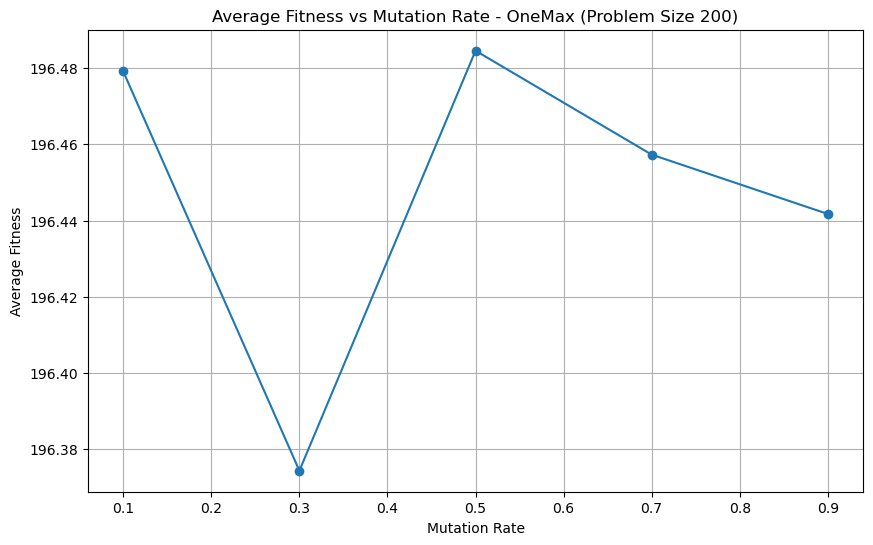

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mlrose_hiive

def create_ga_runner(problem, prob_size, rand_seed, mutation_rate):
    experiment_name = f'OneMax_GA_Size{prob_size}_Seed{rand_seed}_Mutation{mutation_rate}'
    return mlrose_hiive.GARunner(
        problem=problem,
        experiment_name=experiment_name,
        seed=rand_seed,
        iteration_list=2**np.arange(10),
        population_sizes=[400],
        mutation_rates=[mutation_rate]
    )

problem_size = 200
random_seeds = [8, 16, 32, 64, 128]
mutation_rates = [0.1, 0.3, 0.5, 0.7, 0.9]  # Different mutation rates to test

# Initialize an empty DataFrame for storing the results
result_columns = ['Mutation_Rate', 'Seed', 'Iteration', 'Fitness', 'Time', 'FEvals']
results_df = pd.DataFrame(columns=result_columns)

# Define the fitness function for OneMax
fitness_fn_OneMax = mlrose_hiive.OneMax()

# Execute the GA optimization algorithm for each mutation rate and seed
for mutation_rate in mutation_rates:
    for rand_seed in random_seeds:
        # Create the optimization problem instance
        optimization_problem = mlrose_hiive.DiscreteOpt(length=problem_size, fitness_fn=fitness_fn_OneMax, maximize=True, max_val=2)

        ga_runner = create_ga_runner(optimization_problem, problem_size, rand_seed, mutation_rate)
        ga_results = ga_runner.run()

        # Extract the fitness curve data
        fitness_data = ga_results[1]

        # Create a DataFrame for the current mutation rate and seed
        temp_df = pd.DataFrame(fitness_data, columns=['Iteration', 'Fitness', 'Time', 'FEvals'])

        # Add mutation rate and seed information to the DataFrame
        temp_df['Mutation_Rate'] = mutation_rate
        temp_df['Seed'] = rand_seed

        # Rearrange columns to match the new order
        temp_df = temp_df[['Mutation_Rate', 'Seed', 'Iteration', 'Fitness', 'Time', 'FEvals']]

        # Append the data to the main results DataFrame
        results_df = pd.concat([results_df, temp_df], ignore_index=True)

# Calculate the average fitness for each mutation rate
avg_fitness_dict = {}
count_dict = {}

for index, row in results_df.iterrows():
    key = row['Mutation_Rate']
    
    if key not in avg_fitness_dict:
        avg_fitness_dict[key] = 0
        count_dict[key] = 0
    
    avg_fitness_dict[key] += row['Fitness']
    count_dict[key] += 1

avg_fitness_list = []

for key in avg_fitness_dict.keys():
    avg_fitness_list.append({'Mutation_Rate': key, 'Fitness': avg_fitness_dict[key] / count_dict[key]})

avg_fitness_df = pd.DataFrame(avg_fitness_list)

# Debug print to check the structure of the DataFrame
print("avg_fitness_df:")
print(avg_fitness_df.head())

# Plotting the results
plt.figure(figsize=(10, 6))
plt.xlabel('Mutation Rate')
plt.ylabel('Average Fitness')
plt.title('Average Fitness vs Mutation Rate - OneMax (Problem Size 200)')
plt.plot(avg_fitness_df['Mutation_Rate'], avg_fitness_df['Fitness'], marker='o')
plt.grid(True)
plt.show()


Running GA with population size 50 and seed 8...
Running GA with population size 50 and seed 16...
Running GA with population size 50 and seed 32...
Running GA with population size 50 and seed 64...
Running GA with population size 50 and seed 128...
Running GA with population size 100 and seed 8...
Running GA with population size 100 and seed 16...
Running GA with population size 100 and seed 32...
Running GA with population size 100 and seed 64...
Running GA with population size 100 and seed 128...
Running GA with population size 200 and seed 8...
Running GA with population size 200 and seed 16...
Running GA with population size 200 and seed 32...
Running GA with population size 200 and seed 64...
Running GA with population size 200 and seed 128...
Running GA with population size 400 and seed 8...
Running GA with population size 400 and seed 16...
Running GA with population size 400 and seed 32...
Running GA with population size 400 and seed 64...
Running GA with population size 400 a

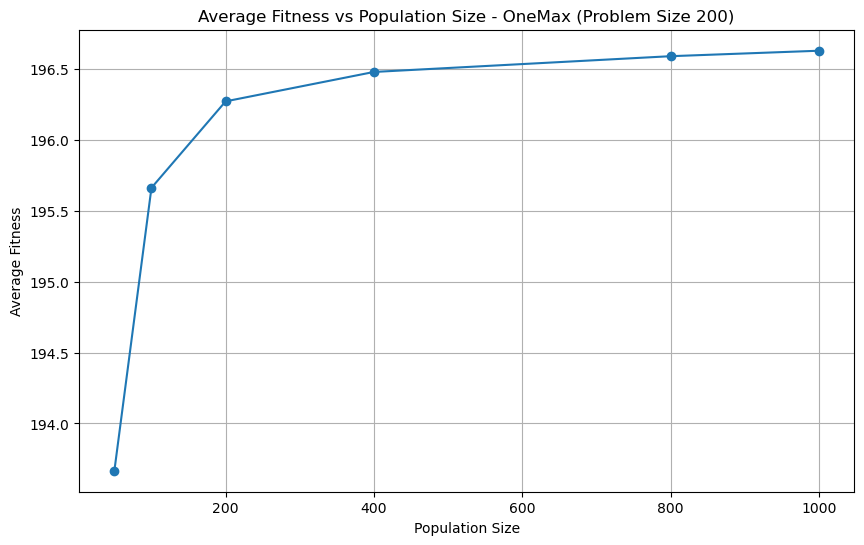

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mlrose_hiive

def create_ga_runner(problem, prob_size, rand_seed, population_size):
    experiment_name = f'OneMax_GA_Size{prob_size}_Seed{rand_seed}_Population{population_size}'
    return mlrose_hiive.GARunner(
        problem=problem,
        experiment_name=experiment_name,
        seed=rand_seed,
        iteration_list=2**np.arange(10),
        population_sizes=[population_size],
        mutation_rates=[0.1]  # Fixed mutation rate for this experiment
    )

problem_size = 200
random_seeds = [8, 16, 32, 64, 128]
population_sizes = [50, 100, 200, 400, 800, 1000]  # Different population sizes to test

# Initialize an empty DataFrame for storing the results
result_columns = ['Population_Size', 'Seed', 'Iteration', 'Fitness', 'Time', 'FEvals']
results_df = pd.DataFrame(columns=result_columns)

# Define the fitness function for OneMax
fitness_fn_OneMax = mlrose_hiive.OneMax()

# Execute the GA optimization algorithm for each population size and seed
for population_size in population_sizes:
    for rand_seed in random_seeds:
        # Create the optimization problem instance
        optimization_problem = mlrose_hiive.DiscreteOpt(length=problem_size, fitness_fn=fitness_fn_OneMax, maximize=True, max_val=2)

        ga_runner = create_ga_runner(optimization_problem, problem_size, rand_seed, population_size)
        ga_results = ga_runner.run()

        # Extract the fitness curve data
        fitness_data = ga_results[1]

        # Create a DataFrame for the current population size and seed
        temp_df = pd.DataFrame(fitness_data, columns=['Iteration', 'Fitness', 'Time', 'FEvals'])

        # Add population size and seed information to the DataFrame
        temp_df['Population_Size'] = population_size
        temp_df['Seed'] = rand_seed

        # Rearrange columns to match the new order
        temp_df = temp_df[['Population_Size', 'Seed', 'Iteration', 'Fitness', 'Time', 'FEvals']]

        # Append the data to the main results DataFrame
        results_df = pd.concat([results_df, temp_df], ignore_index=True)

# Calculate the average fitness for each population size
avg_fitness_dict = {}
count_dict = {}

for index, row in results_df.iterrows():
    key = row['Population_Size']
    
    if key not in avg_fitness_dict:
        avg_fitness_dict[key] = 0
        count_dict[key] = 0
    
    avg_fitness_dict[key] += row['Fitness']
    count_dict[key] += 1

avg_fitness_list = []

for key in avg_fitness_dict.keys():
    avg_fitness_list.append({'Population_Size': key, 'Fitness': avg_fitness_dict[key] / count_dict[key]})

avg_fitness_df = pd.DataFrame(avg_fitness_list)

# Debug print to check the structure of the DataFrame
print("avg_fitness_df:")
print(avg_fitness_df.head())

# Plotting the results
plt.figure(figsize=(10, 6))
plt.xlabel('Population Size')
plt.ylabel('Average Fitness')
plt.title('Average Fitness vs Population Size - OneMax (Problem Size 200)')
plt.plot(avg_fitness_df['Population_Size'], avg_fitness_df['Fitness'], marker='o')
plt.grid(True)
plt.show()


Running GA with crossover rate 0.1 and seed 8...
Running GA with crossover rate 0.1 and seed 16...
Running GA with crossover rate 0.1 and seed 32...
Running GA with crossover rate 0.1 and seed 64...
Running GA with crossover rate 0.1 and seed 128...
Running GA with crossover rate 0.3 and seed 8...
Running GA with crossover rate 0.3 and seed 16...
Running GA with crossover rate 0.3 and seed 32...
Running GA with crossover rate 0.3 and seed 64...
Running GA with crossover rate 0.3 and seed 128...
Running GA with crossover rate 0.5 and seed 8...
Running GA with crossover rate 0.5 and seed 16...
Running GA with crossover rate 0.5 and seed 32...
Running GA with crossover rate 0.5 and seed 64...
Running GA with crossover rate 0.5 and seed 128...
Running GA with crossover rate 0.7 and seed 8...
Running GA with crossover rate 0.7 and seed 16...
Running GA with crossover rate 0.7 and seed 32...
Running GA with crossover rate 0.7 and seed 64...
Running GA with crossover rate 0.7 and seed 128...


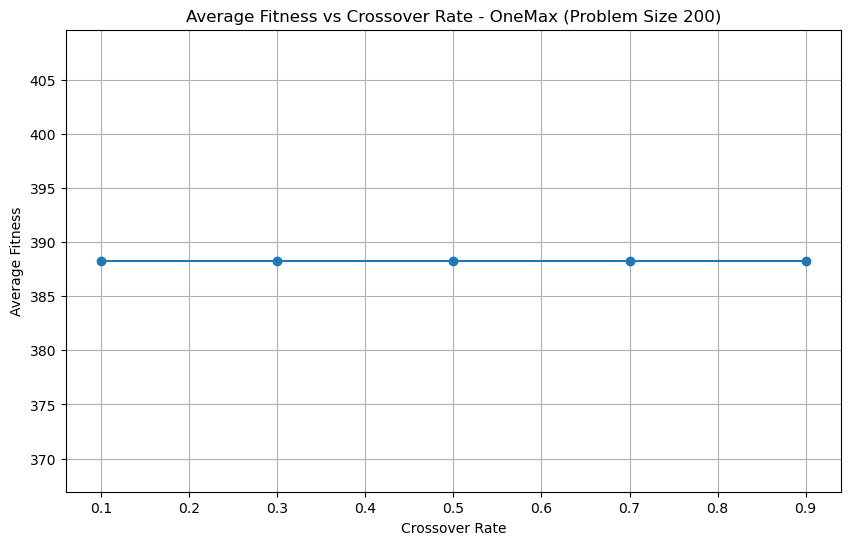

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mlrose_hiive

def create_ga_runner(problem, prob_size, rand_seed, crossover_rate):
    experiment_name = f'OneMax_GA_Size{prob_size}_Seed{rand_seed}_Crossover{crossover_rate}'
    return mlrose_hiive.GARunner(
        problem=problem,
        experiment_name=experiment_name,
        seed=rand_seed,
        iteration_list=2**np.arange(10),
        population_sizes=[400],  # Fixed population size for this experiment
        mutation_rates=[0.5],  # Fixed mutation rate for this experiment
        crossover_rates=[crossover_rate]
    )

problem_size = 400
random_seeds = [8, 16, 32, 64, 128]
crossover_rates = [0.1, 0.3, 0.5, 0.7, 0.9]  # Different crossover rates to test

# Initialize an empty DataFrame for storing the results
result_columns = ['Crossover_Rate', 'Seed', 'Iteration', 'Fitness', 'Time', 'FEvals']
results_df = pd.DataFrame(columns=result_columns)

# Define the fitness function for OneMax
fitness_fn_OneMax = mlrose_hiive.OneMax()

# Execute the GA optimization algorithm for each crossover rate and seed
for crossover_rate in crossover_rates:
    for rand_seed in random_seeds:
        # Create the optimization problem instance
        optimization_problem = mlrose_hiive.DiscreteOpt(length=problem_size, fitness_fn=fitness_fn_OneMax, maximize=True, max_val=2)

        ga_runner = create_ga_runner(optimization_problem, problem_size, rand_seed, crossover_rate)
        ga_results = ga_runner.run()

        # Extract the fitness curve data
        fitness_data = ga_results[1]

        # Create a DataFrame for the current crossover rate and seed
        temp_df = pd.DataFrame(fitness_data, columns=['Iteration', 'Fitness', 'Time', 'FEvals'])

        # Add crossover rate and seed information to the DataFrame
        temp_df['Crossover_Rate'] = crossover_rate
        temp_df['Seed'] = rand_seed

        # Rearrange columns to match the new order
        temp_df = temp_df[['Crossover_Rate', 'Seed', 'Iteration', 'Fitness', 'Time', 'FEvals']]

        # Append the data to the main results DataFrame
        results_df = pd.concat([results_df, temp_df], ignore_index=True)

# Calculate the average fitness for each crossover rate
avg_fitness_dict = {}
count_dict = {}

for index, row in results_df.iterrows():
    key = row['Crossover_Rate']
    
    if key not in avg_fitness_dict:
        avg_fitness_dict[key] = 0
        count_dict[key] = 0
    
    avg_fitness_dict[key] += row['Fitness']
    count_dict[key] += 1

avg_fitness_list = []

for key in avg_fitness_dict.keys():
    avg_fitness_list.append({'Crossover_Rate': key, 'Fitness': avg_fitness_dict[key] / count_dict[key]})

avg_fitness_df = pd.DataFrame(avg_fitness_list)

# Debug print to check the structure of the DataFrame
print("avg_fitness_df:")
print(avg_fitness_df.head())

# Plotting the results
plt.figure(figsize=(10, 6))
plt.xlabel('Crossover Rate')
plt.ylabel('Average Fitness')
plt.title('Average Fitness vs Crossover Rate - OneMax (Problem Size 200)')
plt.plot(avg_fitness_df['Crossover_Rate'], avg_fitness_df['Fitness'], marker='o')
plt.grid(True)
plt.show()


Running SA with initial temperature 1, decay rate 0.001, and seed 8...
Running SA with initial temperature 1, decay rate 0.001, and seed 16...
Running SA with initial temperature 1, decay rate 0.001, and seed 32...
Running SA with initial temperature 1, decay rate 0.001, and seed 64...
Running SA with initial temperature 1, decay rate 0.001, and seed 128...
Running SA with initial temperature 10, decay rate 0.001, and seed 8...
Running SA with initial temperature 10, decay rate 0.001, and seed 16...
Running SA with initial temperature 10, decay rate 0.001, and seed 32...
Running SA with initial temperature 10, decay rate 0.001, and seed 64...
Running SA with initial temperature 10, decay rate 0.001, and seed 128...
Running SA with initial temperature 50, decay rate 0.001, and seed 8...
Running SA with initial temperature 50, decay rate 0.001, and seed 16...
Running SA with initial temperature 50, decay rate 0.001, and seed 32...
Running SA with initial temperature 50, decay rate 0.001,

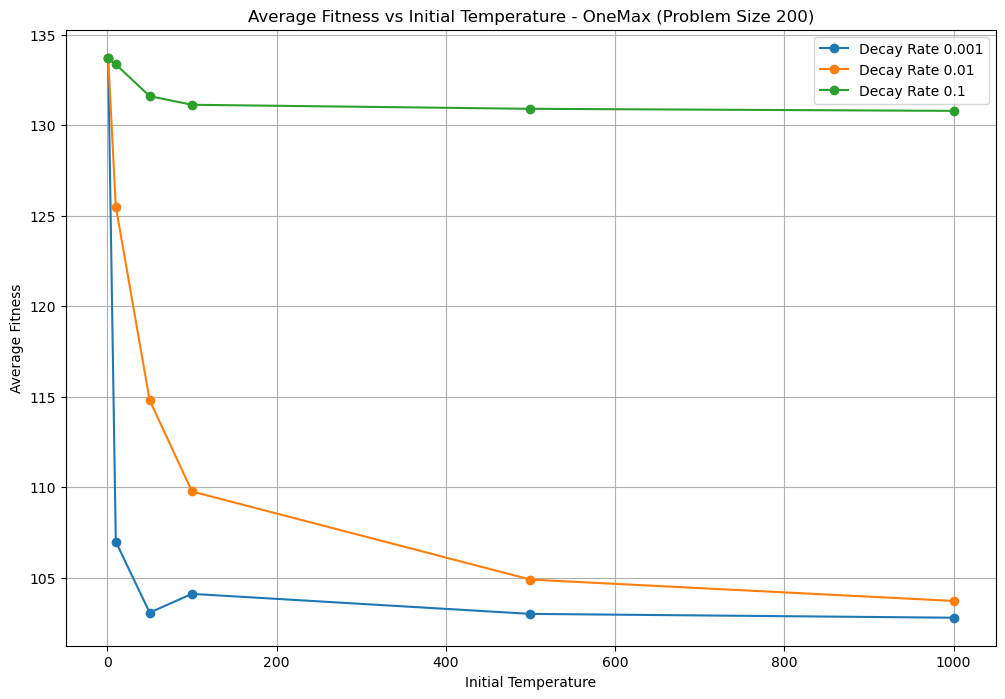

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mlrose_hiive

def create_sa_runner(problem, prob_size, rand_seed, init_temp, decay_rate):
    experiment_name = f'OneMax_SA_Size{prob_size}_Seed{rand_seed}_Temp{init_temp}_Decay{decay_rate}'
    return mlrose_hiive.SARunner(
        problem=problem,
        experiment_name=experiment_name,
        seed=rand_seed,
        iteration_list=2**np.arange(10),
        temperature_list=[mlrose_hiive.ExpDecay(init_temp=init_temp, exp_const=decay_rate, min_temp=1.0)]
    )

problem_size = 200
random_seeds = [8, 16, 32, 64, 128]
init_temps = [1, 10, 50, 100, 500, 1000]  # Different initial temperatures to test
decay_rates = [0.001, 0.01, 0.1]  # Different decay rates to test

# Initialize an empty DataFrame for storing the results
result_columns = ['Initial_Temperature', 'Decay_Rate', 'Seed', 'Iteration', 'Fitness', 'Time', 'FEvals']
results_df = pd.DataFrame(columns=result_columns)

# Define the fitness function for OneMax
fitness_fn_OneMax = mlrose_hiive.OneMax()

# Execute the SA optimization algorithm for each initial temperature, decay rate, and seed
for decay_rate in decay_rates:
    for init_temp in init_temps:
        for rand_seed in random_seeds:
            # Create the optimization problem instance
            optimization_problem = mlrose_hiive.DiscreteOpt(length=problem_size, fitness_fn=fitness_fn_OneMax, maximize=True, max_val=2)

            sa_runner = create_sa_runner(optimization_problem, problem_size, rand_seed, init_temp, decay_rate)
            sa_results = sa_runner.run()

            # Extract the fitness curve data
            fitness_data = sa_results[1]

            # Create a DataFrame for the current initial temperature, decay rate, and seed
            temp_df = pd.DataFrame(fitness_data, columns=['Iteration', 'Fitness', 'Time', 'FEvals'])

            # Add initial temperature, decay rate, and seed information to the DataFrame
            temp_df['Initial_Temperature'] = init_temp
            temp_df['Decay_Rate'] = decay_rate
            temp_df['Seed'] = rand_seed

            # Rearrange columns to match the new order
            temp_df = temp_df[['Initial_Temperature', 'Decay_Rate', 'Seed', 'Iteration', 'Fitness', 'Time', 'FEvals']]

            # Append the data to the main results DataFrame
            results_df = pd.concat([results_df, temp_df], ignore_index=True)

# Calculate the average fitness for each initial temperature and decay rate
avg_fitness_dict = {}
count_dict = {}

for index, row in results_df.iterrows():
    key = (row['Initial_Temperature'], row['Decay_Rate'])
    
    if key not in avg_fitness_dict:
        avg_fitness_dict[key] = 0
        count_dict[key] = 0
    
    avg_fitness_dict[key] += row['Fitness']
    count_dict[key] += 1

avg_fitness_list = []

for key in avg_fitness_dict.keys():
    avg_fitness_list.append({'Initial_Temperature': key[0], 'Decay_Rate': key[1], 'Fitness': avg_fitness_dict[key] / count_dict[key]})

avg_fitness_df = pd.DataFrame(avg_fitness_list)

# Debug print to check the structure of the DataFrame
print("avg_fitness_df:")
print(avg_fitness_df.head())

# Plotting the results
plt.figure(figsize=(12, 8))
for decay_rate in decay_rates:
    subset_df = avg_fitness_df[avg_fitness_df['Decay_Rate'] == decay_rate]
    plt.plot(subset_df['Initial_Temperature'], subset_df['Fitness'], marker='o', label=f"Decay Rate {decay_rate}")
plt.xlabel('Initial Temperature')
plt.ylabel('Average Fitness')
plt.title('Average Fitness vs Initial Temperature - OneMax (Problem Size 200)')
plt.legend()
plt.grid(True)
plt.show()


Running SA with max_attempts 10 and seed 8...
Running SA with max_attempts 10 and seed 16...
Running SA with max_attempts 10 and seed 32...
Running SA with max_attempts 10 and seed 64...
Running SA with max_attempts 10 and seed 128...
Running SA with max_attempts 50 and seed 8...
Running SA with max_attempts 50 and seed 16...
Running SA with max_attempts 50 and seed 32...
Running SA with max_attempts 50 and seed 64...
Running SA with max_attempts 50 and seed 128...
Running SA with max_attempts 100 and seed 8...
Running SA with max_attempts 100 and seed 16...
Running SA with max_attempts 100 and seed 32...
Running SA with max_attempts 100 and seed 64...
Running SA with max_attempts 100 and seed 128...
Running SA with max_attempts 200 and seed 8...
Running SA with max_attempts 200 and seed 16...
Running SA with max_attempts 200 and seed 32...
Running SA with max_attempts 200 and seed 64...
Running SA with max_attempts 200 and seed 128...
Running SA with max_attempts 500 and seed 8...
Run

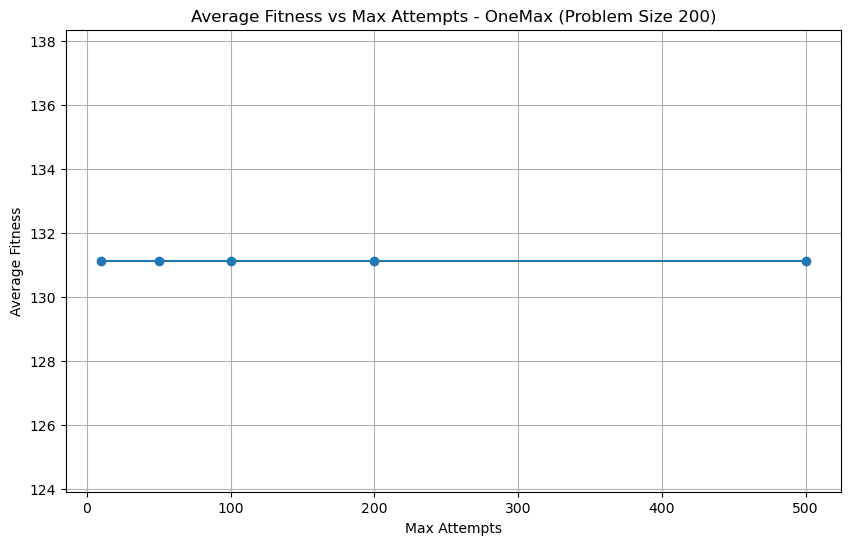

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mlrose_hiive

def create_sa_runner(problem, prob_size, rand_seed, max_attempts):
    experiment_name = f'OneMax_SA_Size{prob_size}_Seed{rand_seed}_MaxAttempts{max_attempts}'
    return mlrose_hiive.SARunner(
        problem=problem,
        experiment_name=experiment_name,
        seed=rand_seed,
        iteration_list=2**np.arange(10),
        temperature_list=[mlrose_hiive.ExpDecay(init_temp=100, exp_const=0.1, min_temp=1.0)],  # Fixed initial temperature for this experiment
        max_attempts=max_attempts
    )

problem_size = 200
random_seeds = [8, 16, 32, 64, 128]
max_attempts_values = [10, 50, 100, 200, 500]  # Different max attempts to test

# Initialize an empty DataFrame for storing the results
result_columns = ['Max_Attempts', 'Seed', 'Iteration', 'Fitness', 'Time', 'FEvals']
results_df = pd.DataFrame(columns=result_columns)

# Define the fitness function for OneMax
fitness_fn_OneMax = mlrose_hiive.OneMax()

# Execute the SA optimization algorithm for each max_attempts value and seed
for max_attempts in max_attempts_values:
    for rand_seed in random_seeds:
        # Create the optimization problem instance
        optimization_problem = mlrose_hiive.DiscreteOpt(length=problem_size, fitness_fn=fitness_fn_OneMax, maximize=True, max_val=2)

        sa_runner = create_sa_runner(optimization_problem, problem_size, rand_seed, max_attempts)
        sa_results = sa_runner.run()

        # Extract the fitness curve data
        fitness_data = sa_results[1]

        # Create a DataFrame for the current max_attempts value and seed
        temp_df = pd.DataFrame(fitness_data, columns=['Iteration', 'Fitness', 'Time', 'FEvals'])

        # Add max_attempts and seed information to the DataFrame
        temp_df['Max_Attempts'] = max_attempts
        temp_df['Seed'] = rand_seed

        # Rearrange columns to match the new order
        temp_df = temp_df[['Max_Attempts', 'Seed', 'Iteration', 'Fitness', 'Time', 'FEvals']]

        # Append the data to the main results DataFrame
        results_df = pd.concat([results_df, temp_df], ignore_index=True)

# Calculate the average fitness for each max_attempts value
avg_fitness_dict = {}
count_dict = {}

for index, row in results_df.iterrows():
    key = row['Max_Attempts']
    
    if key not in avg_fitness_dict:
        avg_fitness_dict[key] = 0
        count_dict[key] = 0
    
    avg_fitness_dict[key] += row['Fitness']
    count_dict[key] += 1

avg_fitness_list = []

for key in avg_fitness_dict.keys():
    avg_fitness_list.append({'Max_Attempts': key, 'Fitness': avg_fitness_dict[key] / count_dict[key]})

avg_fitness_df = pd.DataFrame(avg_fitness_list)

# Debug print to check the structure of the DataFrame
print("avg_fitness_df:")
print(avg_fitness_df.head())

# Plotting the results
plt.figure(figsize=(10, 6))
plt.xlabel('Max Attempts')
plt.ylabel('Average Fitness')
plt.title('Average Fitness vs Max Attempts - OneMax (Problem Size 200)')
plt.plot(avg_fitness_df['Max_Attempts'], avg_fitness_df['Fitness'], marker='o')
plt.grid(True)
plt.show()


Running RHC with restarts 0 and seed 8...
Running RHC with restarts 0 and seed 16...
Running RHC with restarts 0 and seed 32...
Running RHC with restarts 0 and seed 64...
Running RHC with restarts 0 and seed 128...
Running RHC with restarts 5 and seed 8...
Running RHC with restarts 5 and seed 16...
Running RHC with restarts 5 and seed 32...
Running RHC with restarts 5 and seed 64...
Running RHC with restarts 5 and seed 128...
Running RHC with restarts 10 and seed 8...
Running RHC with restarts 10 and seed 16...
Running RHC with restarts 10 and seed 32...
Running RHC with restarts 10 and seed 64...
Running RHC with restarts 10 and seed 128...
Running RHC with restarts 20 and seed 8...
Running RHC with restarts 20 and seed 16...
Running RHC with restarts 20 and seed 32...
Running RHC with restarts 20 and seed 64...
Running RHC with restarts 20 and seed 128...
Running RHC with restarts 50 and seed 8...
Running RHC with restarts 50 and seed 16...
Running RHC with restarts 50 and seed 32...

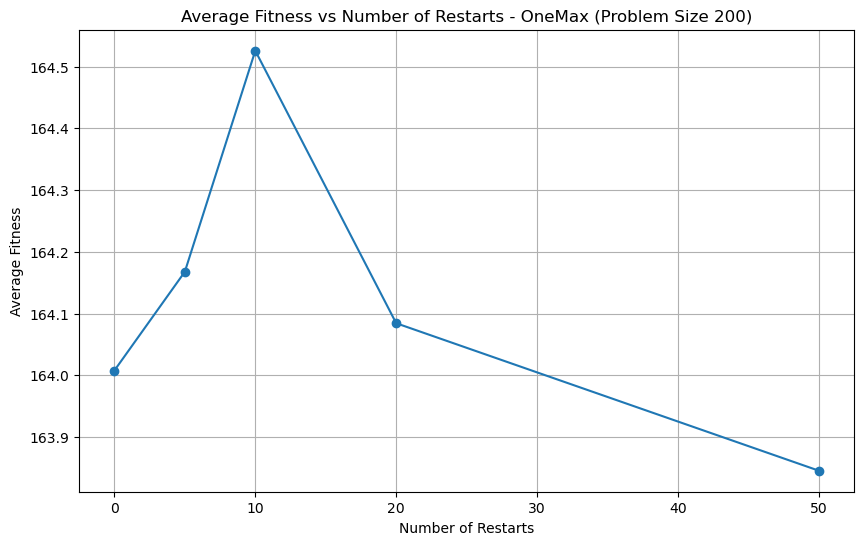

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mlrose_hiive

def create_rhc_runner(problem, prob_size, rand_seed, restarts):
    experiment_name = f'OneMax_RHC_Size{prob_size}_Seed{rand_seed}_Restarts{restarts}'
    return mlrose_hiive.RHCRunner(
        problem=problem,
        experiment_name=experiment_name,
        seed=rand_seed,
        iteration_list=2**np.arange(10),
        restart_list=[restarts]
    )

problem_size = 200
random_seeds = [8, 16, 32, 64, 128]
restarts_values = [0, 5, 10, 20, 50]  # Different number of restarts to test

# Initialize an empty DataFrame for storing the results
result_columns = ['Restarts', 'Seed', 'Iteration', 'Fitness', 'Time', 'FEvals']
results_df = pd.DataFrame(columns=result_columns)

# Define the fitness function for OneMax
fitness_fn_OneMax = mlrose_hiive.OneMax()

# Execute the RHC optimization algorithm for each number of restarts and seed
for restarts in restarts_values:
    for rand_seed in random_seeds:
        # Create the optimization problem instance
        optimization_problem = mlrose_hiive.DiscreteOpt(length=problem_size, fitness_fn=fitness_fn_OneMax, maximize=True, max_val=2)
        rhc_runner = create_rhc_runner(optimization_problem, problem_size, rand_seed, restarts)
        rhc_results = rhc_runner.run()

        # Extract the fitness curve data
        fitness_data = rhc_results[1]

        # Create a DataFrame for the current number of restarts and seed
        temp_df = pd.DataFrame(fitness_data, columns=['Iteration', 'Fitness', 'Time', 'FEvals'])

        # Add number of restarts and seed information to the DataFrame
        temp_df['Restarts'] = restarts
        temp_df['Seed'] = rand_seed

        # Rearrange columns to match the new order
        temp_df = temp_df[['Restarts', 'Seed', 'Iteration', 'Fitness', 'Time', 'FEvals']]

        # Append the data to the main results DataFrame
        results_df = pd.concat([results_df, temp_df], ignore_index=True)

# Calculate the average fitness for each number of restarts
avg_fitness_dict = {}
count_dict = {}

for index, row in results_df.iterrows():
    key = row['Restarts']
    
    if key not in avg_fitness_dict:
        avg_fitness_dict[key] = 0
        count_dict[key] = 0
    
    avg_fitness_dict[key] += row['Fitness']
    count_dict[key] += 1

avg_fitness_list = []

for key in avg_fitness_dict.keys():
    avg_fitness_list.append({'Restarts': key, 'Fitness': avg_fitness_dict[key] / count_dict[key]})

avg_fitness_df = pd.DataFrame(avg_fitness_list)

# Debug print to check the structure of the DataFrame
print("avg_fitness_df:")
print(avg_fitness_df.head())

# Plotting the results
plt.figure(figsize=(10, 6))
plt.xlabel('Number of Restarts')
plt.ylabel('Average Fitness')
plt.title('Average Fitness vs Number of Restarts - OneMax (Problem Size 200)')
plt.plot(avg_fitness_df['Restarts'], avg_fitness_df['Fitness'], marker='o')
plt.grid(True)
plt.show()


Running RHC with max_attempts 10 and seed 8...
Running RHC with max_attempts 10 and seed 16...
Running RHC with max_attempts 10 and seed 32...
Running RHC with max_attempts 10 and seed 64...
Running RHC with max_attempts 10 and seed 128...
Running RHC with max_attempts 50 and seed 8...
Running RHC with max_attempts 50 and seed 16...
Running RHC with max_attempts 50 and seed 32...
Running RHC with max_attempts 50 and seed 64...
Running RHC with max_attempts 50 and seed 128...
Running RHC with max_attempts 100 and seed 8...
Running RHC with max_attempts 100 and seed 16...
Running RHC with max_attempts 100 and seed 32...
Running RHC with max_attempts 100 and seed 64...
Running RHC with max_attempts 100 and seed 128...
Running RHC with max_attempts 200 and seed 8...
Running RHC with max_attempts 200 and seed 16...
Running RHC with max_attempts 200 and seed 32...
Running RHC with max_attempts 200 and seed 64...
Running RHC with max_attempts 200 and seed 128...
Running RHC with max_attempts 

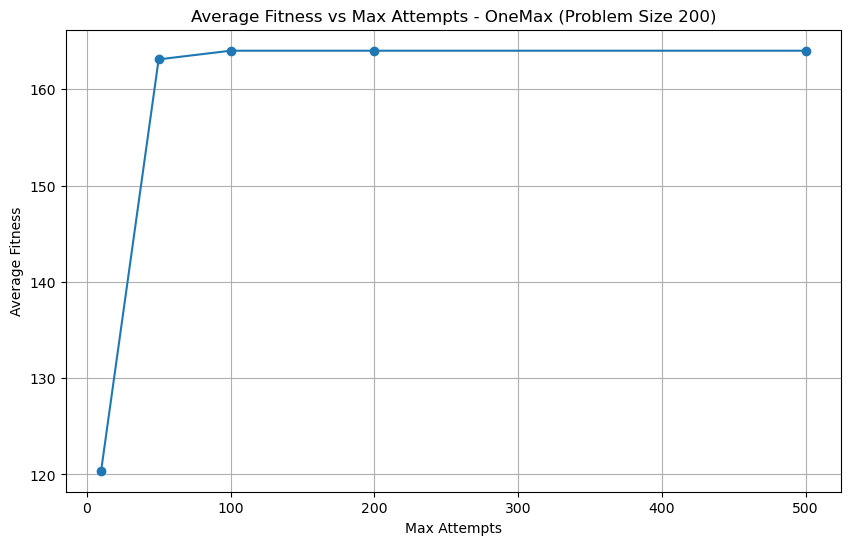

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mlrose_hiive

def create_rhc_runner(problem, prob_size, rand_seed, max_attempts):
    experiment_name = f'OneMax_RHC_Size{prob_size}_Seed{rand_seed}_MaxAttempts{max_attempts}'
    return mlrose_hiive.RHCRunner(
        problem=problem,
        experiment_name=experiment_name,
        seed=rand_seed,
        iteration_list=2**np.arange(10),
        restart_list=[0],  # No restarts
        max_attempts=max_attempts
    )

problem_size = 200
random_seeds = [8, 16, 32, 64, 128]
max_attempts_values = [10, 50, 100, 200, 500]  # Different max attempts to test

# Initialize an empty DataFrame for storing the results
result_columns = ['Max_Attempts', 'Seed', 'Iteration', 'Fitness', 'Time', 'FEvals']
results_df = pd.DataFrame(columns=result_columns)

# Define the fitness function for OneMax
fitness_fn_OneMax = mlrose_hiive.OneMax()

# Execute the RHC optimization algorithm for each max_attempts value and seed
for max_attempts in max_attempts_values:
    for rand_seed in random_seeds:
        # Create the optimization problem instance
        optimization_problem = mlrose_hiive.DiscreteOpt(length=problem_size, fitness_fn=fitness_fn_OneMax, maximize=True, max_val=2)
        rhc_runner = create_rhc_runner(optimization_problem, problem_size, rand_seed, max_attempts)
        rhc_results = rhc_runner.run()

        # Extract the fitness curve data
        fitness_data = rhc_results[1]

        # Create a DataFrame for the current max_attempts value and seed
        temp_df = pd.DataFrame(fitness_data, columns=['Iteration', 'Fitness', 'Time', 'FEvals'])

        # Add max_attempts and seed information to the DataFrame
        temp_df['Max_Attempts'] = max_attempts
        temp_df['Seed'] = rand_seed

        # Rearrange columns to match the new order
        temp_df = temp_df[['Max_Attempts', 'Seed', 'Iteration', 'Fitness', 'Time', 'FEvals']]

        # Append the data to the main results DataFrame
        results_df = pd.concat([results_df, temp_df], ignore_index=True)

# Calculate the average fitness for each max_attempts value
avg_fitness_dict = {}
count_dict = {}

for index, row in results_df.iterrows():
    key = row['Max_Attempts']
    
    if key not in avg_fitness_dict:
        avg_fitness_dict[key] = 0
        count_dict[key] = 0
    
    avg_fitness_dict[key] += row['Fitness']
    count_dict[key] += 1

avg_fitness_list = []

for key in avg_fitness_dict.keys():
    avg_fitness_list.append({'Max_Attempts': key, 'Fitness': avg_fitness_dict[key] / count_dict[key]})

avg_fitness_df = pd.DataFrame(avg_fitness_list)

# Debug print to check the structure of the DataFrame
print("avg_fitness_df:")
print(avg_fitness_df.head())

# Plotting the results
plt.figure(figsize=(10, 6))
plt.xlabel('Max Attempts')
plt.ylabel('Average Fitness')
plt.title('Average Fitness vs Max Attempts - OneMax (Problem Size 200)')
plt.plot(avg_fitness_df['Max_Attempts'], avg_fitness_df['Fitness'], marker='o')
plt.grid(True)
plt.show()


Running RHC with max_iters 10 and seed 8...
Running RHC with max_iters 10 and seed 16...
Running RHC with max_iters 10 and seed 32...
Running RHC with max_iters 10 and seed 64...
Running RHC with max_iters 10 and seed 128...
Running RHC with max_iters 50 and seed 8...
Running RHC with max_iters 50 and seed 16...
Running RHC with max_iters 50 and seed 32...
Running RHC with max_iters 50 and seed 64...
Running RHC with max_iters 50 and seed 128...
Running RHC with max_iters 100 and seed 8...
Running RHC with max_iters 100 and seed 16...
Running RHC with max_iters 100 and seed 32...
Running RHC with max_iters 100 and seed 64...
Running RHC with max_iters 100 and seed 128...
Running RHC with max_iters 200 and seed 8...
Running RHC with max_iters 200 and seed 16...
Running RHC with max_iters 200 and seed 32...
Running RHC with max_iters 200 and seed 64...
Running RHC with max_iters 200 and seed 128...
Running RHC with max_iters 500 and seed 8...
Running RHC with max_iters 500 and seed 16...

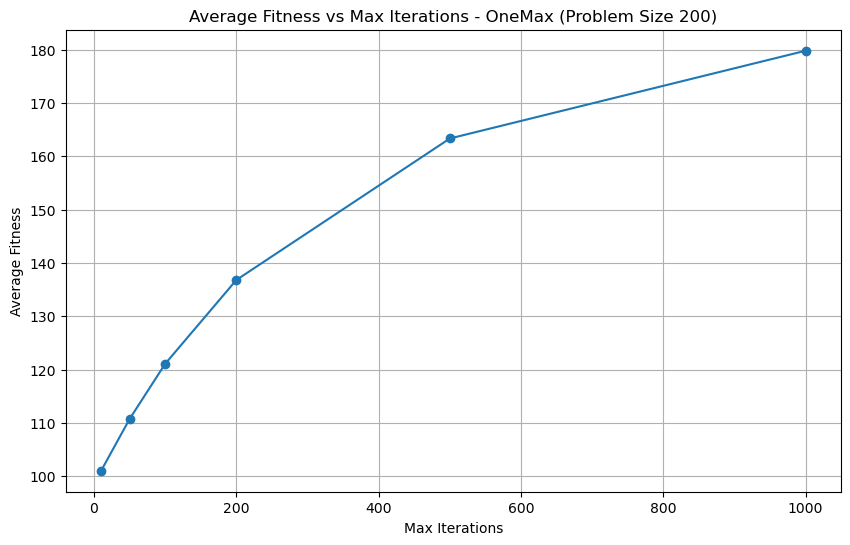

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mlrose_hiive

def create_rhc_runner(problem, prob_size, rand_seed, max_iters):
    experiment_name = f'OneMax_RHC_Size{prob_size}_Seed{rand_seed}_MaxIters{max_iters}'
    return mlrose_hiive.RHCRunner(
        problem=problem,
        experiment_name=experiment_name,
        seed=rand_seed,
        iteration_list=[max_iters],  # Specify max_iters here
        restart_list=[0]  # No restarts for this experiment
    )

problem_size = 200
random_seeds = [8, 16, 32, 64, 128]
max_iters_values = [10, 50, 100, 200, 500, 1000]  # Different max iterations to test

# Initialize an empty DataFrame for storing the results
result_columns = ['Max_Iterations', 'Seed', 'Iteration', 'Fitness', 'Time', 'FEvals']
results_df = pd.DataFrame(columns=result_columns)

# Define the fitness function for OneMax
fitness_fn_OneMax = mlrose_hiive.OneMax()

# Execute the RHC optimization algorithm for each max_iters value and seed
for max_iters in max_iters_values:
    for rand_seed in random_seeds:
        # Create the optimization problem instance
        optimization_problem = mlrose_hiive.DiscreteOpt(length=problem_size, fitness_fn=fitness_fn_OneMax, maximize=True, max_val=2)
        rhc_runner = create_rhc_runner(optimization_problem, problem_size, rand_seed, max_iters)
        rhc_results = rhc_runner.run()

        # Extract the fitness curve data
        fitness_data = rhc_results[1]

        # Create a DataFrame for the current max_iters value and seed
        temp_df = pd.DataFrame(fitness_data, columns=['Iteration', 'Fitness', 'Time', 'FEvals'])

        # Add max_iters and seed information to the DataFrame
        temp_df['Max_Iterations'] = max_iters
        temp_df['Seed'] = rand_seed

        # Rearrange columns to match the new order
        temp_df = temp_df[['Max_Iterations', 'Seed', 'Iteration', 'Fitness', 'Time', 'FEvals']]

        # Append the data to the main results DataFrame
        results_df = pd.concat([results_df, temp_df], ignore_index=True)

# Calculate the average fitness for each max_iters value
avg_fitness_dict = {}
count_dict = {}

for index, row in results_df.iterrows():
    key = row['Max_Iterations']
    
    if key not in avg_fitness_dict:
        avg_fitness_dict[key] = 0
        count_dict[key] = 0
    
    avg_fitness_dict[key] += row['Fitness']
    count_dict[key] += 1

avg_fitness_list = []

for key in avg_fitness_dict.keys():
    avg_fitness_list.append({'Max_Iterations': key, 'Fitness': avg_fitness_dict[key] / count_dict[key]})

avg_fitness_df = pd.DataFrame(avg_fitness_list)

# Debug print to check the structure of the DataFrame
print("avg_fitness_df:")
print(avg_fitness_df.head())

# Plotting the results
plt.figure(figsize=(10, 6))
plt.xlabel('Max Iterations')
plt.ylabel('Average Fitness')
plt.title('Average Fitness vs Max Iterations - OneMax (Problem Size 200)')
plt.plot(avg_fitness_df['Max_Iterations'], avg_fitness_df['Fitness'], marker='o')
plt.grid(True)
plt.show()
